# Baseline Model

We implemented a simple baseline model that models each message as a sequence of characters i.i.d. drawn from the marginal character distribution found in the training data.

In more detail, the conditional likelihood of a message $\mathbf{m}$ given the message belongs to class $y$ under the baseline model is

$$P [\mathbf{m} | y ] = \prod_{i=1}^{l} P[m_i = c| y]$$

where $l$ is the length of the message and $m_i$ the character at position $i$ in message $\mathbf{m}$.

During training, the baseline model extracts the empirical distribution of marginal frequency counts for each character $P[c | y]$ from the training set. During prediction, the model calculates the conditional likelihood of a message under each class and outputs a guess $y$ for the class under which the message has a higher likelihood.

This baseline model assume a uniform prior over all classes. 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [39]:
import numpy as np
import pandas as pd
import pickle
import json

import sys
sys.path.append('../')
from src.plot_utils import *
set_style()

# Baseline model trained on fixed set of keys

##### Load model

In [4]:
with open('../outputs/manual/models/baseline_fixed_key', 'rb') as f:
    model = pickle.load(f)

##### Visualise difference in distribution

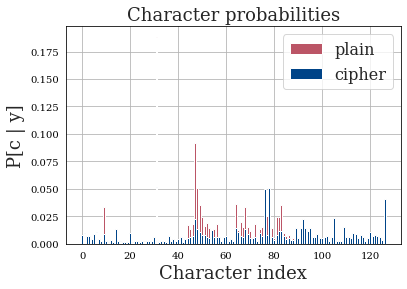

In [40]:
fig = plt_character_dist(model)

There is some visible difference between the two distributions in the training data so the model might be able to use this information to distinguish between the two classes. However, this approach is unlikely to be robust to key rotations

##### Load validation results

In [41]:
with open('../outputs/manual/predictions/baseline_fixed_key_val_test_manual_fixed_key.json') as f:
    val = json.load(f)
    
print('Accuracy on test set for model trained on fixed, validated on fixed key: %.2f'%(np.mean(val['accuracy'])*100))

Accuracy on test set for model trained on fixed, validated on fixed key: 53.94


In [43]:
with open('../outputs/manual/predictions/baseline_fixed_key_val_test_manual_different_key.json') as f:
    val = json.load(f)
    
print('Accuracy on test set for model trained on fixed, validated on rotated key: %.2f'%(np.mean(val['accuracy'])*100))

Accuracy on test set for model trained on fixed, validated on rotated key: 53.10


Slight decline in accuracy when evaluated on the test set with different key.

# Baseline model trained on mix of ciphers

In [44]:
with open('../outputs/mixed/baseline_mixed', 'rb') as f:
    model = pickle.load(f)

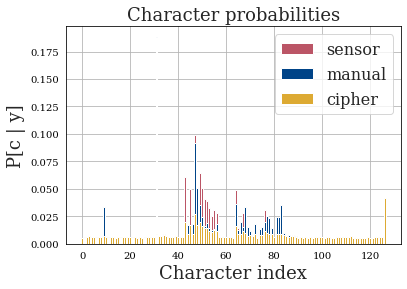

In [45]:
fig = plt_character_dist(model)

Result more as expected: Having a frequently rotating key for cipher generation in the training data makes distribution of characters more uniform in ciphertexts. This model should perform much better.

In [46]:
with open('../outputs/mixed/predictions/baseline_mixed_val_test_mixed.json') as f:
    val = json.load(f)
    
print('Accuracy on test set for model trained on fixed, validated on rotated key: %.2f'%(np.mean(val['accuracy'])*100))

Accuracy on test set for model trained on fixed, validated on rotated key: 80.33


Which indeed it does.